# Single Layer BiDirectional LSTM

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfdf
tf.__version__

'2.2.0'

In [2]:
dataset,info = tfdf.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True)

In [3]:
train_dataset, test_dataset = dataset['train'],dataset['test']

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size,output_dim=64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64)),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
NUM_EPOCHS=2
history = model.fit(train_dataset,epochs=NUM_EPOCHS,validation_data=test_dataset)

Epoch 1/2
391/391 [==============================] - 794s 2s/step - loss: 0.5534 - accuracy: 0.7087 - val_loss: 0.4565 - val_accuracy: 0.7975
Epoch 2/2
391/391 [==============================] - 883s 2s/step - loss: 0.3704 - accuracy: 0.8490 - val_loss: 0.4207 - val_accuracy: 0.8149


In [12]:
from matplotlib import pyplot as plt

def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()

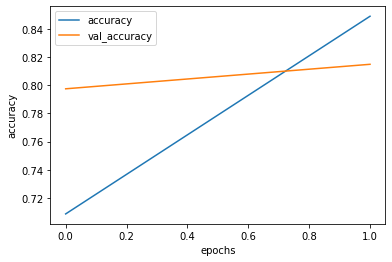

In [13]:
plot_graphs(history,'accuracy')

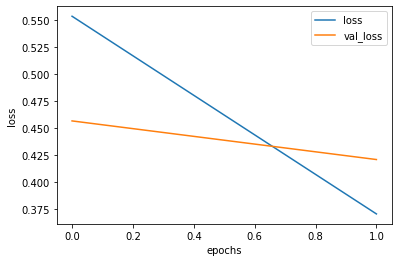

In [14]:
plot_graphs(history,'loss')